In [1]:
!pip install scikit-learn
!pip install matplotlib

In [2]:
#Import Statement

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
# Define dataset size
num_samples = 10000

# Generate synthetic numerical data
np.random.seed(42)
ages = np.random.randint(21, 65, num_samples)  # Age between 21 and 65
incomes = np.random.randint(20000, 200000, num_samples)  # Income between 20k-200k
loan_amounts = np.random.randint(5000, 50000, num_samples)  # Loan between 5k-50k
credit_scores = np.random.randint(300, 850, num_samples)  # Credit score range

# Generate categorical data
employment_types = np.random.choice(['salaried', 'self-employed', 'unemployed'], num_samples)

# Generate synthetic applicant statements
statements = [
    "I always pay my bills on time.",
    "My income is stable and I have good savings.",
    "I recently lost my job but I'm confident I'll recover.",
    "I have had difficulty making payments in the past.",
    "I invest carefully and manage my expenses well.",
    "I've taken multiple loans before and repaid them successfully.",
    "My credit score dropped recently, but I'm working on improving it.",
]
applicant_statements = np.random.choice(statements, num_samples)

# Generate synthetic labels (loan default)
defaults = np.random.choice([0, 1], num_samples, p=[0.8, 0.2])  # 20% default rate

# Create DataFrame
df = pd.DataFrame({
    'age': ages,
    'income': incomes,
    'loan_amount': loan_amounts,
    'credit_score': credit_scores,
    'employment_type': employment_types,
    'applicant_statement': applicant_statements,
    'default': defaults
})

# Save to CSV
df.to_csv('applicants.csv', index=False)
print("Synthetic dataset 'applicants.csv' created successfully!")

Synthetic dataset 'applicants.csv' created successfully!


In [16]:
# Load the dataset
df = pd.read_csv('applicants.csv')

# Introduce missing values randomly
np.random.seed(42)
missing_rate = 0.05  # 5% missing data

# Apply missingness to numerical columns
for col in ['age', 'income', 'loan_amount', 'credit_score']:
    mask = np.random.rand(len(df)) < missing_rate
    df.loc[mask, col] = np.nan

# Apply missingness to categorical columns
mask = np.random.rand(len(df)) < missing_rate
df.loc[mask, 'employment_type'] = np.nan

# Apply missingness to text field (optional, but less common)
mask = np.random.rand(len(df)) < missing_rate
df.loc[mask, 'applicant_statement'] = np.nan

# Save the modified dataset
df.to_csv('applicants_with_missing.csv', index=False)
print("Dataset with missing values saved as 'applicants_with_missing.csv'")

Dataset with missing values saved as 'applicants_with_missing.csv'


In [17]:
# Load dataset with missing values
df = pd.read_csv('applicants_with_missing.csv')

# Impute missing numerical values with mean
df['age'].fillna(df['age'].mean(), inplace=True)
df['income'].fillna(df['income'].mean(), inplace=True)
df['loan_amount'].fillna(df['loan_amount'].mean(), inplace=True)
df['credit_score'].fillna(df['credit_score'].mean(), inplace=True)

# Impute categorical values with mode
df['employment_type'].fillna(df['employment_type'].mode()[0], inplace=True)

# Impute text feature with a placeholder
df['applicant_statement'].fillna("No Statement Provided", inplace=True)

C:\Users\Mann\AppData\Local\Temp\ipykernel_20328\1303301934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\Mann\AppData\Local\Temp\ipykernel_20328\1303301934.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [18]:
# One-hot encode employment_type
from sklearn.preprocessing import OrdinalEncoder

# Define order (if applicable)
employment_order = [['unemployed', 'self-employed', 'salaried']]  # Define ranking order

# Apply ordinal encoding
oe = OrdinalEncoder(categories=employment_order)
df['employment_type'] = oe.fit_transform(df[['employment_type']])
df['employment_type'] = df['employment_type'].astype(int)


In [19]:


# Select numerical columns
num_cols = ['age', 'income', 'loan_amount', 'credit_score']

# Apply normalization
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Save the preprocessed dataset
df.to_csv('applicants_preprocessed.csv', index=False)
print("Preprocessed dataset saved as 'applicants_preprocessed.csv'")

Preprocessed dataset saved as 'applicants_preprocessed.csv'


In [38]:


# # Sigmoid function
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

In [39]:
# # Compute loss function
# def compute_loss(w, X, y, lambda_reg):
#     N = X.shape[0]
#     y_pred = sigmoid(X @ w)
#     loss = (-1 / N) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
#     reg_term = (lambda_reg / 2) * np.sum(w**2)  # L2 regularization
#     return loss + reg_term

# # Compute gradient
# def compute_gradient(w, X, y, lambda_reg):
#     N = X.shape[0]
#     y_pred = sigmoid(X @ w)
#     gradient = (1 / N) * X.T @ (y_pred - y) + lambda_reg * w  # Regularized gradient
#     return gradient

In [40]:
# def batch_gradient_descent(X, y, lr, lambda_reg, epochs):
#     w = np.zeros(X.shape[1])  # Initialize weights
#     losses = []  # Store loss for visualization
#     for epoch in range(epochs):
#         gradient = compute_gradient(w, X, y, lambda_reg)
#         w -= lr * gradient  # Update weights
#         loss = compute_loss(w, X, y, lambda_reg)
#         losses.append(loss)
#         if epoch % 100 == 0:
#             print(f'Epoch {epoch}: Loss = {loss:.4f}')
#     return w, losses

In [41]:
# from sklearn.model_selection import train_test_split

# # Load preprocessed dataset
# df = pd.read_csv('applicants_preprocessed.csv')

# # Separate features (X) and labels (y)
# X = df.drop(columns=['default'])  # Feature set
# y = df['default']  # Target variable

# # Convert to NumPy arrays explicitly to prevent errors
# X_np = np.array(X)
# y_np = np.array(y)

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

NaN in X_np: False
Inf in X_np: False
NaN in y_np: False
Unique values in y_np: [0. 1.]
Training Set: (8000, 7), Test Set: (2000, 7)
X_train dtype: float64, shape: (8000, 7)
y_train dtype: float64, shape: (8000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.float64'>
<class 'numpy.ndarray'>

Training with lr=0.0001, lambda=0.1
Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.6913
Epoch 200: Loss = 0.6895
Epoch 300: Loss = 0.6877
Epoch 400: Loss = 0.6859
Epoch 500: Loss = 0.6842
Epoch 600: Loss = 0.6825
Epoch 700: Loss = 0.6808
Epoch 800: Loss = 0.6791
Epoch 900: Loss = 0.6774

Training with lr=0.0001, lambda=1
Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.6913
Epoch 200: Loss = 0.6895
Epoch 300: Loss = 0.6878
Epoch 400: Loss = 0.6861
Epoch 500: Loss = 0.6844
Epoch 600: Loss = 0.6827
Epoch 700: Loss = 0.6811
Epoch 800: Loss = 0.6796
Epoch 900: Loss = 0.6780

Training with lr=0.001, lambda=0.1
Epoch 0: Loss = 0.6930
Epoch 100: Loss = 0.6757
Epoch 200: Loss

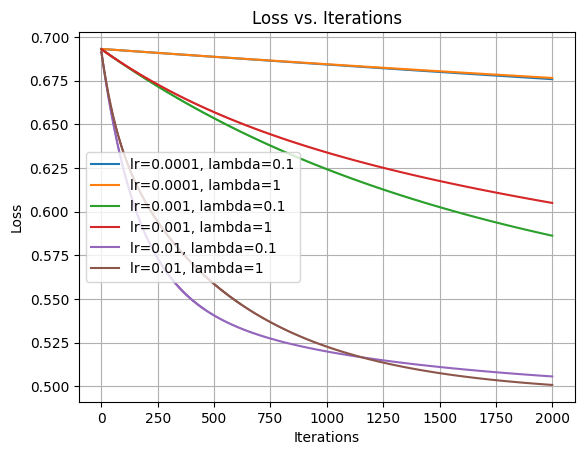

lr=0.0001, lambda=0.1 → Accuracy: 0.8050, Precision: 0.0000, Recall: 0.0000, ROC-AUC: 0.5000
lr=0.0001, lambda=1 → Accuracy: 0.8050, Precision: 0.0000, Recall: 0.0000, ROC-AUC: 0.5000
lr=0.001, lambda=0.1 → Accuracy: 0.8050, Precision: 0.0000, Recall: 0.0000, ROC-AUC: 0.5000
lr=0.001, lambda=1 → Accuracy: 0.8050, Precision: 0.0000, Recall: 0.0000, ROC-AUC: 0.5000
lr=0.01, lambda=0.1 → Accuracy: 0.8050, Precision: 0.0000, Recall: 0.0000, ROC-AUC: 0.5000
lr=0.01, lambda=1 → Accuracy: 0.8050, Precision: 0.0000, Recall: 0.0000, ROC-AUC: 0.5000


c:\Users\Mann\anaconda3\envs\llmOnclusive\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mann\anaconda3\envs\llmOnclusive\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mann\anaconda3\envs\llmOnclusive\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mann

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# Load preprocessed dataset
df = pd.read_csv('applicants_preprocessed.csv')

# Separate features and target
X = df.drop(columns=['default'])
y = df['default']

# Ensure all feature columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = y.astype(int)

# # Convert to NumPy arrays
# X_np = X.to_numpy()
# y_np = y.to_numpy()

# ✅ Convert to NumPy arrays
X_np = X.to_numpy(dtype=np.float64)
y_np = y.to_numpy(dtype=np.float64)

# Final safety checks before model
X_np = np.nan_to_num(X_np, nan=0.0, posinf=0.0, neginf=0.0)
y_np = np.nan_to_num(y_np, nan=0.0, posinf=0.0, neginf=0.0)

# Add bias term (column of ones)
X_np = np.hstack([np.ones((X_np.shape[0], 1)), X_np])

# Sanity check
print("NaN in X_np:", np.isnan(X_np).any())
print("Inf in X_np:", np.isinf(X_np).any())
print("NaN in y_np:", np.isnan(y_np).any())
print("Unique values in y_np:", np.unique(y_np))


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")
# Final check of shapes and types
print(f"X_train dtype: {X_train.dtype}, shape: {X_train.shape}")
print(f"y_train dtype: {y_train.dtype}, shape: {y_train.shape}")

print(type(X_train), type(X_train[0]))
print(type(y_train), type(y_train[0]))
print(type(X_train @ np.zeros(X_train.shape[1])))

# === Logistic Regression Core ===

# Numerically stable sigmoid
def sigmoid(z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    # return np.where(z >= 0,
    #                 1 / (1 + np.exp(-z)),
    #                 np.exp(z) / (1 + np.exp(z)))

# Stable cross-entropy loss with L2 regularization
def compute_loss(w, X, y, lambda_reg):
    N = X.shape[0]
    y_pred = sigmoid(X @ w)
    epsilon = 1e-8  # To prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = (-1 / N) * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    reg_term = (lambda_reg / 2) * np.sum(w[1:] ** 2)  # Regularize all but bias
    return loss + reg_term

# Compute gradient with L2 regularization
def compute_gradient(w, X, y, lambda_reg):
    N = X.shape[0]
    y_pred = sigmoid(X @ w)
    gradient = (1 / N) * X.T @ (y_pred - y)
    # Apply L2 regularization to weights (except bias term)
    gradient[1:] += lambda_reg * w[1:]
    return gradient

# Batch gradient descent function
def batch_gradient_descent(X, y, lr, lambda_reg, epochs):
    w = np.zeros(X.shape[1])  # Initialize weights (including bias)
    losses = []

    for epoch in range(epochs):
        gradient = compute_gradient(w, X, y, lambda_reg)
        w -= lr * gradient
        loss = compute_loss(w, X, y, lambda_reg)
        losses.append(loss)
        if np.isnan(loss):
            print(f"NaN loss detected at epoch {epoch}, learning rate: {lr}, lambda: {lambda_reg}")
            break
        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
    return w, losses

# Predict function
def predict(X, w):
    return (sigmoid(X @ w) >= 0.5).astype(int)

# === Hyperparameter Tuning and Training ===

learning_rates = [0.0001, 0.001, 0.01]
lambda_values = [0.1, 1]
results = {}

for lr in learning_rates:
    for lambda_reg in lambda_values:
        print(f"\nTraining with lr={lr}, lambda={lambda_reg}")
        w, losses = batch_gradient_descent(X_train, y_train, lr, lambda_reg, epochs=1000)
        results[(lr, lambda_reg)] = (w, losses)

# === Plotting Loss ===
for (lr, lambda_reg), (_, losses) in results.items():
    plt.plot(losses, label=f'lr={lr}, lambda={lambda_reg}')

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs. Iterations")
plt.legend()
plt.grid(True)
plt.show()

# === Evaluation ===
for (lr, lambda_reg), (w, _) in results.items():
    y_pred_test = predict(X_test, w)
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_pred_test)

    print(f"lr={lr}, lambda={lambda_reg} → Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
          f"Recall: {recall:.4f}, ROC-AUC: {roc_auc:.4f}")


 Key Takeaways:
Higher Learning Rate (lr) = faster convergence.

But must be careful — too high can lead to divergence (not the case here).

Higher Regularization (lambda) = more penalty on weights.

This slows learning and can prevent overfitting.

Notice how for same lr, increasing lambda results in slower loss reduction (compare green vs red, or purple vs brown).

Best performing so far:

lr=0.01, lambda=0.1 (purple) — balances speed and stability well.

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# ------------------------------
# STEP 1: Generate applicant_statement
# ------------------------------
low_risk_statements = [
    "I always pay my bills on time and have a stable income.",
    "My savings are strong, and I manage expenses carefully.",
    "I have a long history of successfully repaying loans."
]
medium_risk_statements = [
    "I sometimes struggle with payments but always catch up.",
    "My income is stable, but unexpected expenses can be challenging.",
    "I've taken multiple loans before and repaid most of them on time."
]
high_risk_statements = [
    "I have missed payments in the past and struggled with debt.",
    "I recently lost my job and have outstanding loans.",
    "My credit score dropped significantly last year due to financial hardship."
]

np.random.seed(42)
risk_categories = np.random.choice(['low', 'medium', 'high'], 10000, p=[0.6, 0.3, 0.1])
applicant_statements = [
    np.random.choice(
        low_risk_statements if risk == 'low' else medium_risk_statements if risk == 'medium' else high_risk_statements
    ) for risk in risk_categories
]

df = pd.read_csv("applicants.csv")
df["applicant_statement"] = applicant_statements
df.to_csv("applicants_updated.csv", index=False)
print("Saved: applicants_updated.csv")

# ------------------------------
# STEP 2: Fine-tune BERT
# ------------------------------
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Tokenize all inputs
tokens = tokenizer(df["applicant_statement"].tolist(), padding=True, truncation=True, max_length=50, return_tensors="pt")
labels = torch.tensor(df["default"].values)

# Split dataset
train_idx, test_idx = train_test_split(np.arange(len(df)), test_size=0.2, random_state=42)

class LoanDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels": self.labels[idx]
        }

train_data = LoanDataset(tokens['input_ids'][train_idx], tokens['attention_mask'][train_idx], labels[train_idx])
test_data = LoanDataset(tokens['input_ids'][test_idx], tokens['attention_mask'][test_idx], labels[test_idx])
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Fine-tune
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(), lr=5e-5)
model.train()

for epoch in range(3):
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}: Loss = {total_loss:.4f}")

model.save_pretrained("bert_loan_default_model")
print("Saved: fine-tuned BERT model")

# ------------------------------
# STEP 3: Extract embeddings for logistic regression
# ------------------------------
embedding_model = BertModel.from_pretrained("bert-base-uncased")
embedding_model.to(device)
embedding_model.eval()

def extract_bert_embedding(text):
    tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=50)
    tokens = {key: val.to(device) for key, val in tokens.items()}
    with torch.no_grad():
        output = embedding_model(**tokens)
    return output.last_hidden_state[:, 0, :].cpu().numpy().flatten()  # [CLS] token

df["bert_embedding"] = df["applicant_statement"].apply(lambda x: extract_bert_embedding(x))
embeddings = np.vstack(df["bert_embedding"].values)

# Combine with numerical features (drop text & categorical for simplicity)
X_structured = df.drop(columns=["applicant_statement", "bert_embedding", "default"]).to_numpy()
X_final = np.hstack([X_structured, embeddings])
y_final = df["default"].values

np.save("X_final.npy", X_final)
np.save("y_final.npy", y_final)
print("Saved: Final dataset with BERT embeddings")

# ------------------------------
# STEP 4: Logistic Regression using custom implementation
# ------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, w, lambda_reg):
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)
    m = X.shape[0]
    h = sigmoid(X @ w)
    loss = -(y * np.log(h + 1e-9) + (1 - y) * np.log(1 - h + 1e-9)).mean()
    reg = (lambda_reg / (2 * m)) * np.sum(w ** 2)
    return loss + reg

def batch_gradient_descent(X, y, lr, lambda_reg, epochs):
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)
    m, n = X.shape
    w = np.zeros(n)
    losses = []
    for _ in range(epochs):
        h = sigmoid(X @ w)
        grad = (X.T @ (h - y)) / m + lambda_reg * w / m
        w -= lr * grad
        losses.append(compute_loss(X, y, w, lambda_reg))
    return w, losses

def predict(X, w):
    return (sigmoid(X @ w) >= 0.5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)
learning_rates = [0.01, 0.001, 0.0001]
lambda_values = [0.1, 1]
results = {}

for lr in learning_rates:
    for lambda_reg in lambda_values:
        print(f"Training Logistic Regression: lr={lr}, lambda={lambda_reg}")
        X_train = np.array(X_train, dtype=float)
        X_test = np.array(X_test, dtype=float)
        y_train = np.array(y_train, dtype=float)
        y_test = np.array(y_test, dtype=float)
        w, losses = batch_gradient_descent(X_train, y_train, lr, lambda_reg, epochs=1000)
        results[(lr, lambda_reg)] = (w, losses)

# ------------------------------
# STEP 5: Evaluate
# ------------------------------
for (lr, lambda_reg), (w, _) in results.items():
    y_pred = predict(X_test, w)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"lr={lr}, lambda={lambda_reg} → Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, ROC-AUC={auc:.4f}")


c:\Users\Mann\anaconda3\envs\llmOnclusive\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Saved: applicants_updated.csv


c:\Users\Mann\anaconda3\envs\llmOnclusive\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Mann\anaconda3\envs\llmOnclusive\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disabl

Epoch 1: Loss = 125.9239
Epoch 2: Loss = 125.1121
Epoch 3: Loss = 124.4922
Saved: fine-tuned BERT model
Saved: Final dataset with BERT embeddings
Training Logistic Regression: lr=0.01, lambda=0.1


TypeError: can't multiply sequence by non-int of type 'float'